<a href="https://colab.research.google.com/github/mulatz/Amazon-Sales-Dataset-EDA/blob/main/Copy_of_Traffic_sign_classification_project_created_by_MulatW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will use a convolutional neural network to build, train, and assess a traffic sign classification model. This model will be built using TensorFlow and Keras. There are several classes involved in the classification problem. This approach can be used to create smarter automobiles.

In [ ]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

# Save the uploaded file to the correct location
import os
os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded['kaggle.json'])

# Set permissions
os.chmod('/root/.kaggle/kaggle.json', 600)

print("kaggle.json uploaded and configured!")


Saving kaggle.json to kaggle.json
kaggle.json uploaded and configured!


First, we'll connect to Kaggle using the Kaggle API, which you can download from the settings of your Kaggle account and upload here (upload box).

In [ ]:
# Now, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

lets Setting up Kaggle using Kaggle API.

In [ ]:
# now Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


Now To store the data, we will create a new directory and make it the current working directory.

In [ ]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         140980       1204  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          17509        309  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           2194         35  1.0

Using the search option(-s) and the title "dogbreedidfromcomp," one can search Kaggle for the necessary dataset. We can also use various search methods, such as looking through datasets, kernels, notebooks, contests, etc.

In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
/content


The next step after finding the data would be to use the search option's references to download the data into a collaborative notebook.

In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

The downloaded data will be unzipped, and any unnecessary files will be eliminated.

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

now lets import the necssary liberaries

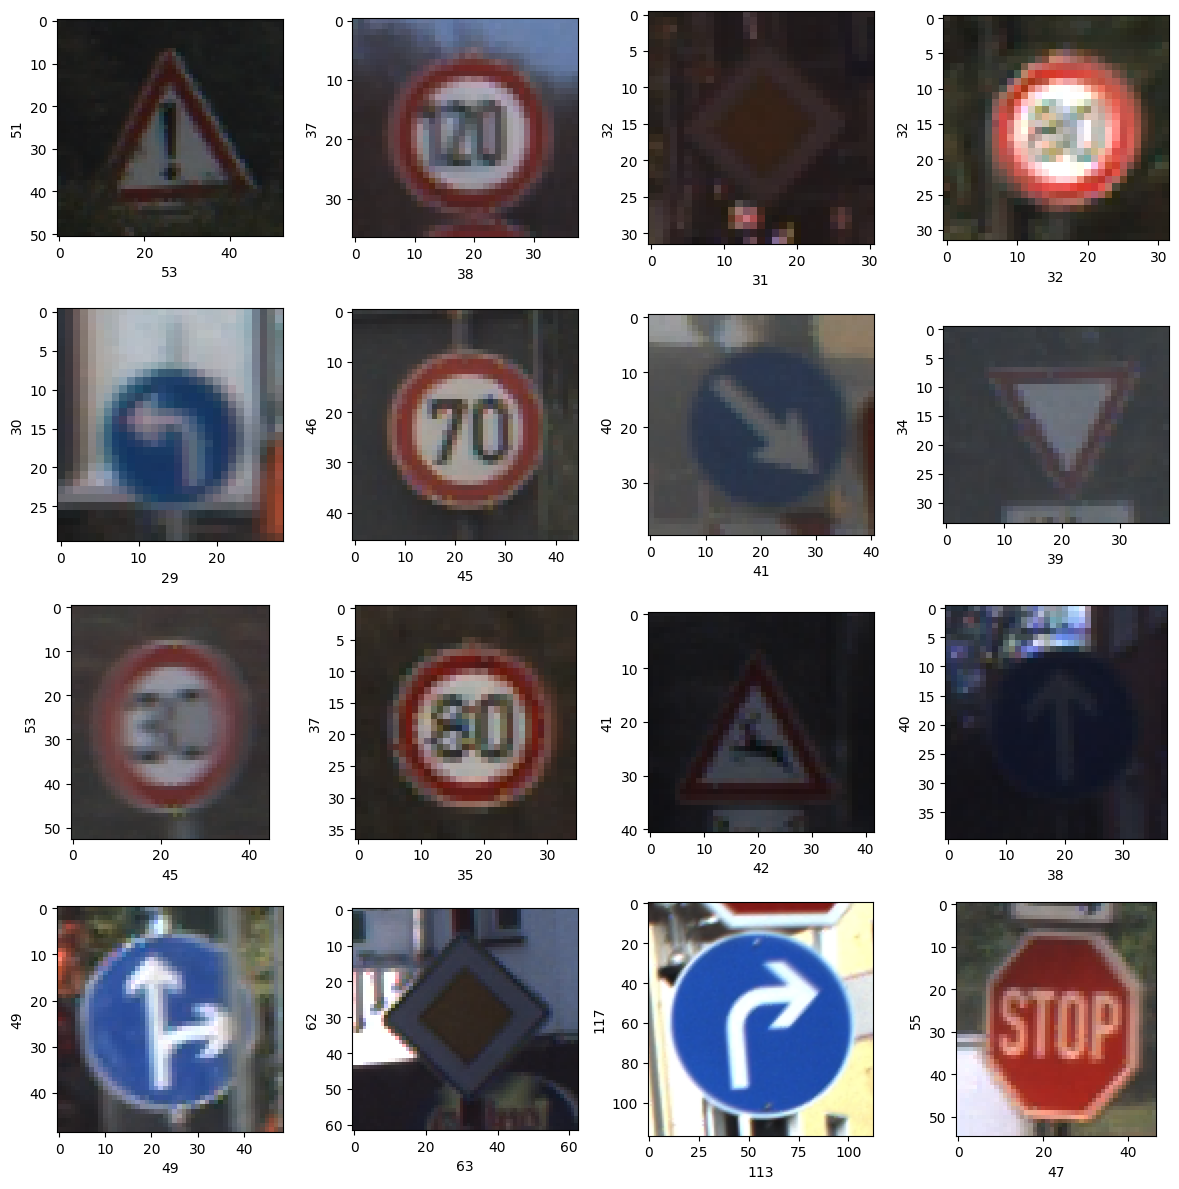

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Let's show a few of the traffic sign images from the test dataset now. This shows how the image's dimensions are inconsistent.

In [ ]:
# Since image sizes vary, we must equalize them, thus we will use the mean of dimensions.
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

We will need the same-sized pictures for additional processing. Thus, we will begin saving the dimensions of every image from each of the 43 classes in the training dataset.  

In [ ]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  128.0  Dimension 2 Mean :  213.33333333333334


We will now analyze both dimensions and determine their mean value. Here, we can observe that the average shape across all of the photos is (50,50).

In [ ]:
#  reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [ ]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

We will now normalize and turn each image into a numpy array.

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [ ]:
images.shape

(39209, 50, 50, 3)

Check the shape of the image

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070
10,2010
4,1980
5,1860
25,1500


We will now examine each class's photographs to determine whether or not the data is balanced. We can conclude that the data is balanced based on the outcome.

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

The data would then be divided into training and validation, with 20% going to validation and 80% going to training.

In [ ]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

converting the class column  in to catagorical using catagorical function

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 232s - 944ms/step - accuracy: 0.3277 - loss: 2.4204 - val_accuracy: 0.6849 - val_loss: 1.2402
Epoch 2/10
246/246 - 224s - 910ms/step - accuracy: 0.6383 - loss: 1.1451 - val_accuracy: 0.8840 - val_loss: 0.5543
Epoch 3/10
246/246 - 274s - 1s/step - accuracy: 0.7596 - loss: 0.7409 - val_accuracy: 0.9455 - val_loss: 0.2713
Epoch 4/10
246/246 - 252s - 1s/step - accuracy: 0.8136 - loss: 0.5681 - val_accuracy: 0.9634 - val_loss: 0.1830
Epoch 5/10
246/246 - 261s - 1s/step - accuracy: 0.8442 - loss: 0.4824 - val_accuracy: 0.9749 - val_loss: 0.1389
Epoch 6/10
246/246 - 268s - 1s/step - accuracy: 0.8657 - loss: 0.4073 - val_accuracy: 0.9804 - val_loss: 0.1205
Epoch 7/10
246/246 - 254s - 1s/step - accuracy: 0.8837 - loss: 0.3598 - val_accuracy: 0.9846 - val_loss: 0.0962
Epoch 8/10
246/246 - 232s - 945ms/step - accuracy: 0.8959 - loss: 0.3212 - val_accuracy: 0.9851 - val_loss: 0.0796
Epoch 9/10
246/246 - 233s - 946ms/step - accuracy: 0.9024 - loss: 0.2994 - val_accuracy: 0.9871

<Axes: >

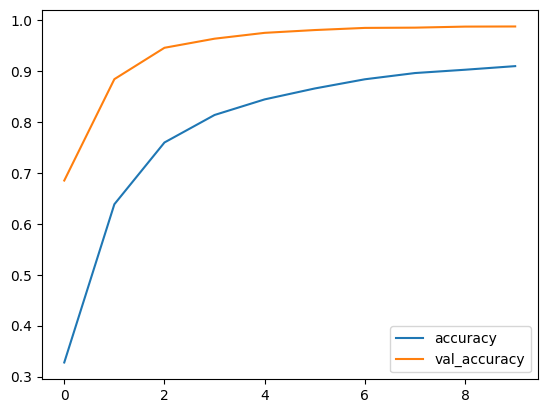

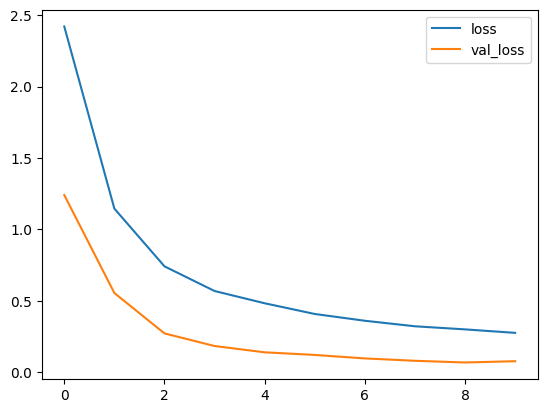

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

We will then display the accuracy and loss for each epoch. To do this, we will plot the model history that we have stored in the pandas dataframe.

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

constructing the variable with the test dataset's path. When we downloaded the dataset, we discovered that the test pictures folder contained an unprocessable GT-final_test.csv file. We shall thus delete that file

In [ ]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

The test images would then be resized, converted into a numpy array, and normalized by developing a program.

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

calling the above created function on the test image

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# Assuming `model` is your trained Keras model and `test_images` is your input data
import numpy as np

# Predict probabilities for each class
predictions = model.predict(test_images)

# Convert probabilities to class predictions (index of the highest probability)
y_pred = np.argmax(predictions, axis=1)

# Output the predictions
y_pred


395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step


array([16,  1, 38, ..., 38,  7, 10])

now we will the model to  make prediction on  our test image y-pred

In [ ]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

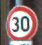

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


***Conclustion***
 We began by obtaining the dataset, preprocessing it, building the model, and then utilizing the model to determine the predictions. We discovered that this dataset has forty-three classes during preprocessing. In just 50 epochs, the model achieved an accuracy of 95%+; using hyperparameter tuning, we may further refine the model and achieve even more accuracy.